In [1]:
from pprint import pprint

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from cuhk_sysu_pedes.pedes_annotations import build_pedes_annotations_from_file
from cuhk_sysu_pedes.stat import (
    counting_detections,
    counting_frames,
    counting_persons,
    are_missing_captions,
    count_words,
    compute_captions_lengths,
)

In [2]:
sns.set_theme(rc={"figure.figsize": (12, 7)})

In [12]:
# Get annotations from file
annotations = build_pedes_annotations_from_file("./data/CUHK-PEDES/")
annotations.info()
annotations.head(10)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23421 entries, (8130, 10935) to (5641, 7262)
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   split_pedes  23421 non-null  category
 1   caption_1    23421 non-null  object  
 2   caption_2    23421 non-null  object  
dtypes: category(1), object(2)
memory usage: 1.4+ MB


split_pedes  \
person_id frame_id               
8130      10935          train   
          10938          train   
          10936          train   
          10937          train   
6297      8250           train   
          8251           train   
4720      6006           train   
          6026           train   
6996      9271           train   
          9272           train   

                                                            caption_1  \
person_id frame_id                                                      
8130      10935     The man is walking.  He is wearing a bright gr...   
          10938     The man is wearing safety gear including a neo...   
          10936     A man wearing a blue shirt, a neon green vest,...   
          10937     A police officer wearing a uniform of dark pan...   
6297      8250      A dark haired woman is wearing a striped t-shi...   
          8251      THE DARK HAIRED WOMAN CARRYING A SHOPPING BAG ...   
4720      6006      A man wearing light colored blue jeans, a gray...   
          6026      A man wearing jeans and black sneakers is wear...   
6996      9271      This woman has one glass and is wearing a blac...   
          9272      The woman is wearing dark pants and a patterne...   

                                                            caption_2  
person_id frame_id                                                     
8130      10935     This man is wearing a green vest over a blue s...  
          10938     the man is wearing an officer hat, a safety ve...  
          10936     The man is wearing a light blue shirt and dark...  
          10937     A man wearing a neon green vest, a pair of bla...  
6297      8250      This woman is wearing a purple striped short s...  
          8251      A woman wearing a white and red stripe shirt, ...  
4720      6006      A man wearing a gray shirt, a pair of blue jea...  
          6026      The man is wearing blue jeans and blue sneaker...  
6996      9271      A woman wearing a black and brown shirt, a pai...  
          9272      A woman with long black hair is wearing a blac...

In [11]:
annotations_train = annotations[annotations.split_pedes == "train"]
annotations_test = annotations[annotations.split_pedes == "test"]
annotations_val = annotations[annotations.split_pedes == "val"]

# Analyse de données de CUHK-PEDES

On [the paper](https://arxiv.org/abs/1702.05729), we have some stats from the detections count, words and length of captions. In this notebook, we compare our extraction of PEDES with the original stat. 


## Detections: captions and persons stat

We have **13,003** persons for **40,206** images with 2 descriptions by images (**80,412** in total).

We do an overall comparison of the data.


##### Comparison with PEDES splits

In [25]:
n_crops_pedes_train, n_crops_pedes_test, n_crops_pedes_val = 34_054, 3_078, 3_074
n_persons_pedes_train, n_persons_pedes_test, n_persons_pedes_val = 11_003, 1_000, 1_000

In [22]:
n_crops_train, n_crops_test, n_crops_val = (
    len(annotations_train),
    len(annotations_test),
    len(annotations_val),
)

print(
    f"# Crops (Train samples): {n_crops_train:,}\n"
    f"# Crops (Test samples): {n_crops_test:,}\n"
    f"# Crops (Validation samples): {n_crops_val:,}"
)

# Crops (Train samples): 19,892
# Crops (Test samples): 1,763
# Crops (Validation samples): 1,766


In [23]:
n_persons_train, n_persons_test, n_persons_val = (
    len(annotations_train.index.get_level_values('person_id').unique()),
    len(annotations_test.index.get_level_values('person_id').unique()),
    len(annotations_val.index.get_level_values('person_id').unique()),
)

print(
    f"# Persons (Train samples): {n_persons_train:,}\n"
    f"# Persons (Test samples): {n_persons_test:,}\n"
    f"# Persons (Validation samples): {n_persons_val:,}"
)

# Persons (Train samples): 7,150
# Persons (Test samples): 641
# Persons (Validation samples): 641


In [29]:
ratio_crops_train = n_crops_train / n_crops_pedes_train
ratio_crops_test = n_crops_test / n_crops_pedes_test
ratio_crops_val = n_crops_val / n_crops_pedes_val

print(
    f"Our annotations contains {ratio_crops_train:.2%} of PEDES train samples.\n"
    f"Our annotations contains {ratio_crops_test:.2%} of PEDES test samples.\n"
    f"Our annotations contains {ratio_crops_val:.2%} of PEDES val samples.\n"
)

Our annotations contains 58.41% of PEDES train samples.
Our annotations contains 57.28% of PEDES test samples.
Our annotations contains 57.45% of PEDES val samples.



##### Overall

In [5]:
# Counting detections, frames, persons
n_detections = counting_detections(annotations)
n_frames = counting_frames(annotations)
n_persons = counting_persons(annotations)

In [32]:
n_crops_pedes_all = n_crops_pedes_test+n_crops_pedes_train+n_crops_pedes_val
n_persons_pedes_all = n_persons_pedes_test+n_persons_pedes_train+n_persons_pedes_val

print(
    f"{'# Detections (PEDES full)':<40s}: {n_crops_pedes_all:,}\n"
    f"{'# Detections (PEDES x SYSU)':<40s}: {n_detections:,}\n\n"
    f"{'# Persons (PEDES full)':<40s}: {n_persons_pedes_all:,}\n"
    f"{'# Persons (PEDES x SYSU)':<40s}: {n_persons:,}\n\n"
    f"{'# Frames (PEDES x SYSU)':<40s}: {n_frames:,}\n"
    f"{'Some captions are missing':<40s}: {are_missing_captions(annotations)}\n"
)

# Detections (PEDES full)               : 40,206
# Detections (PEDES x SYSU)             : 23,421

# Persons (PEDES full)                  : 13,003
# Persons (PEDES x SYSU)                : 8,432

# Frames (PEDES x SYSU)                 : 16,694
Some captions are missing               : False



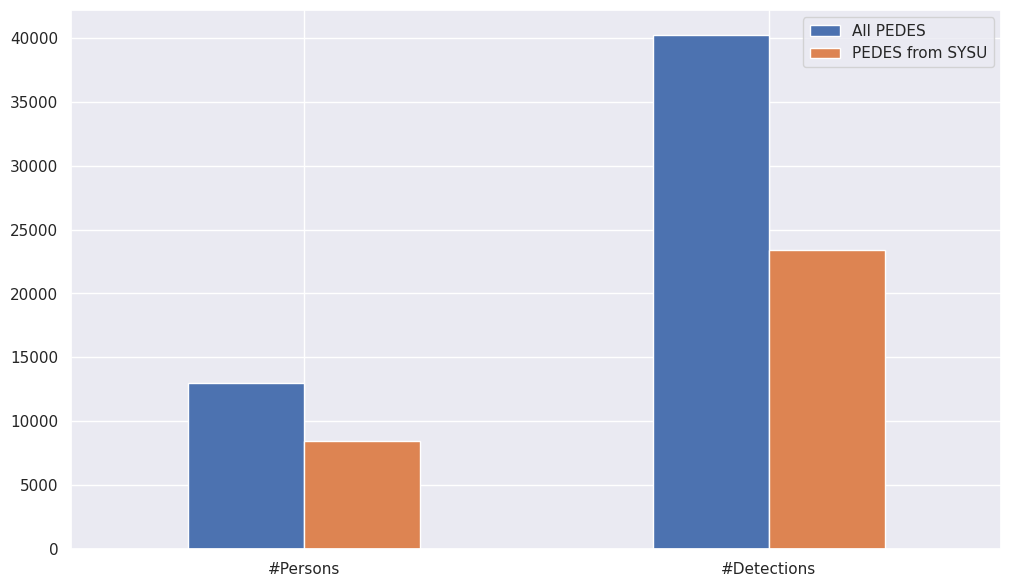

In [33]:
# Plot comparison of data between SYSU subset and full PEDES
n_detections_persons_stat = pd.DataFrame(
    {
        "#Persons": (13_003, n_persons),
        "#Detections": (40_206, n_detections),
    },
    index=("All PEDES", "PEDES from SYSU"),
)

n_detections_persons_stat.T.plot.bar(rot=0)
plt.legend()
plt.show()

## Words and vocabulary

We are counting the number of words, unique words and their lengths since those are stats given in the article. Then we can make a comparison. Plus, we check that there is no difference between captions #1 and #2.

In [36]:
# Count words, vocab size and number of captions
count_of_words = count_words(annotations)

In [37]:
pprint(
    {
        caption_subset_name: {stat_name: stat_value}
        for caption_subset_name, stat_dict in count_of_words.items()
        for stat_name, stat_value in stat_dict.items()
        if type(stat_value) == int  # Display only int stat, not pd object
    },
    sort_dicts=False,
)

{'CAPTION 1 AND 2': {'CAPTIONS COUNT': 46842},
 'CAPTION 1': {'CAPTIONS COUNT': 23421},
 'CAPTION 2': {'CAPTIONS COUNT': 23421}}


In PEDES, the sentences are **at least 15 words** and most of it is **between 20 to 40**. The **longest sentence is 96**. The **average sentence length is 23.5 words**.

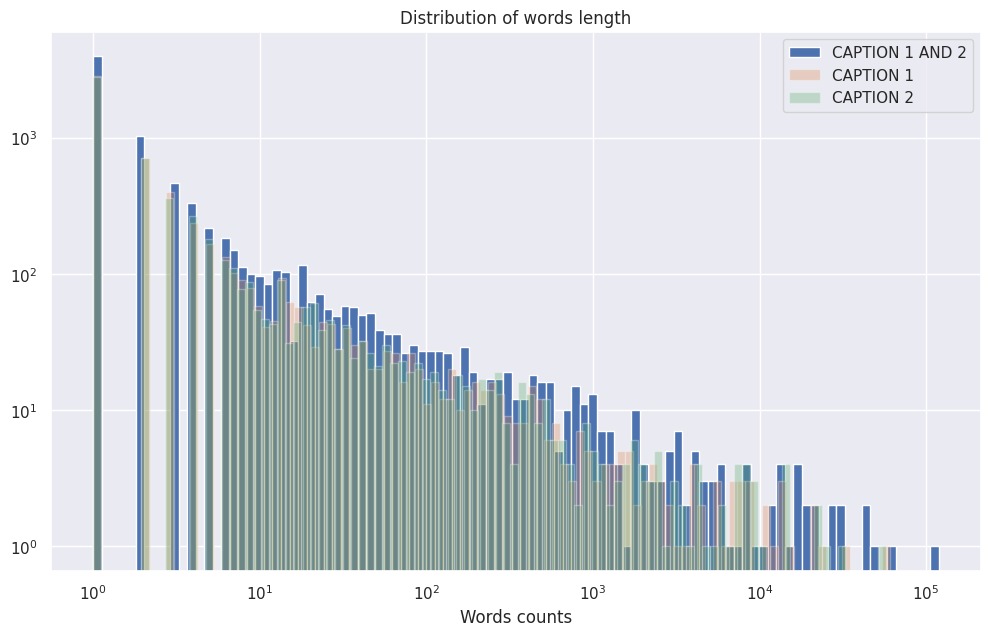

In [38]:
# Compare words counts by captions
WORD_STAT_X_TICKS = (1, 100, 500, 1_000, 50_000, 100_000)
for i, (caption_subset_name, captions_subset_stat) in enumerate(count_of_words.items()):
    count = captions_subset_stat["WORDS STAT"]
    plt.hist(
        count,
        bins=np.geomspace(count.min(), count.max(), 100),
        alpha=1 if i == 0 else 0.3,
        label=caption_subset_name,
    )
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Words counts")
plt.title("Distribution of words length")
plt.legend()
plt.show()

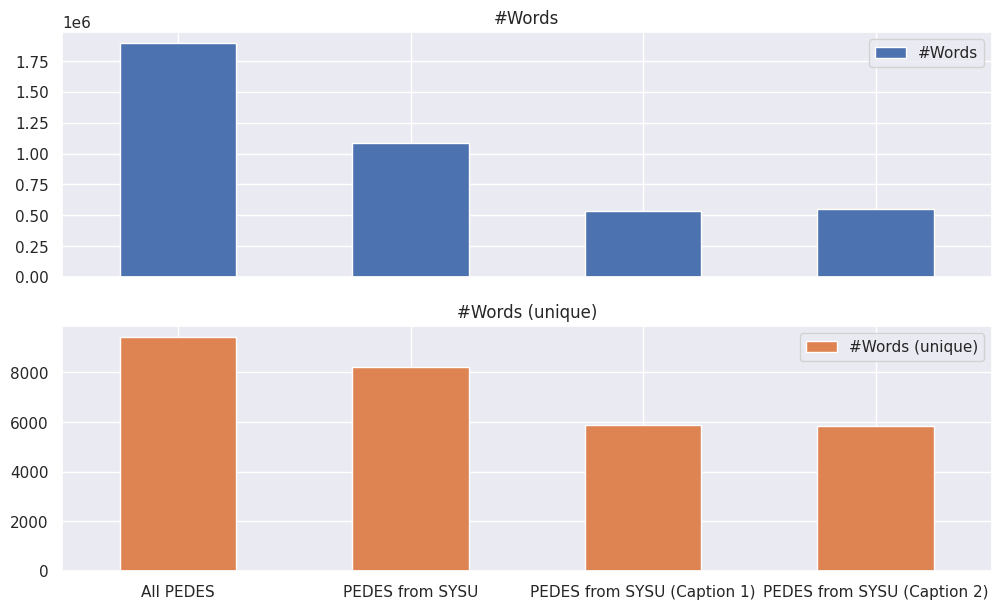

In [39]:
# Comparison between words count in full PEDES and extractions (1&2, 1, 2)
words_stats_pd = pd.DataFrame(
    {
        "#Words": (
            1_893_118,
            *tuple(
                subset_caption["WORDS STAT"].sum()
                for subset_caption in count_of_words.values()
            ),
        ),
        "#Words (unique)": (
            9_408,
            *tuple(
                subset_caption["WORDS STAT"].index.size
                for subset_caption in count_of_words.values()
            ),
        ),
    },
    index=(
        "All PEDES",
        "PEDES from SYSU",
        "PEDES from SYSU (Caption 1)",
        "PEDES from SYSU (Caption 2)",
    ),
)

words_stats_pd.plot.bar(rot=0, subplots=True)
plt.show()

## Length of descriptions

There are **1,893,118 words** based on **9,408 unique words** in PEDES. 

In [40]:
# Compute lengths of captions
captions_lengths = compute_captions_lengths(annotations)

In [41]:
pprint(
    {key: value for key, value in captions_lengths.items() if key != "STAT"},
    sort_dicts=False,
)

{'MEAN': 23.277336578284444,
 'STD': 7.315998805936077,
 'INTERVALL CENTERED 1 STD': (15.961337772348367, 30.593335384220524),
 'PROPORTION CENTERED 1 STD': 0.8341659194739763}


Text(0.5, 1.0, 'Distribution of the number of words in captions.')

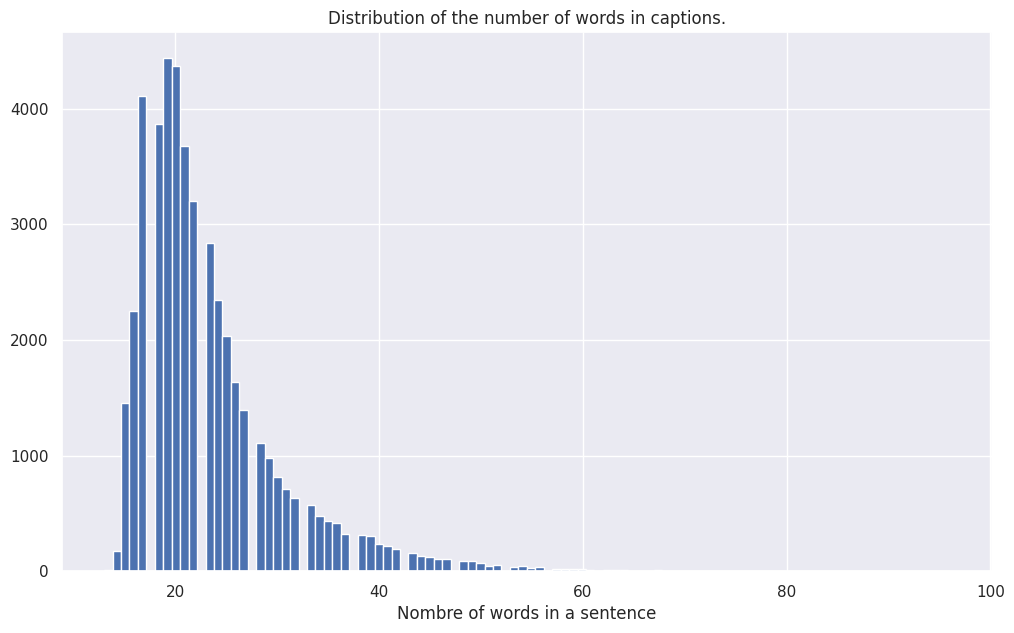

In [42]:
# Visualise distribution of the lenghts of captions (in words)
plt.hist(captions_lengths["STAT"], bins=100)
plt.xlabel("Nombre of words in a sentence")
plt.title("Distribution of the number of words in captions.")